In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Import all data

In [2]:
X_train = pd.read_parquet("X/X_train.parquet")
X_test = pd.read_parquet("X/X_test.parquet")
Y_train = pd.read_parquet("Y/Y_train.parquet")
Y_test = pd.read_parquet("Y/Y_test.parquet")
X_train = X_train[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']]
X_test = X_test[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']]
Complete = pd.read_parquet("dataset.parquet")

In [3]:
scalerX = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scalerX.transform(X_train))
X_test = pd.DataFrame(scalerX.transform(X_test))
scalerY = MinMaxScaler().fit(Y_train)
Y_train = pd.DataFrame(scalerY.transform(Y_train))
Y_test = pd.DataFrame(scalerY.transform(Y_test))
Y1_train = Y_train[[0]]
Y1_test = Y_test[[0]]
Y2_train = Y_train[[1]]
Y2_test = Y_test[[1]]
Y3_train = Y_train[[2]]
Y3_test = Y_test[[2]]
Y4_train = Y_train[[3]]
Y4_test = Y_test[[3]]
Y5_train = Y_train[[4]]
Y5_test = Y_test[[4]]
Y6_train = Y_train[[5]]
Y6_test = Y_test[[5]]

## Train and score

In [4]:
parameters = {'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
              'n_estimators':[50, 100, 200, 500, 1000],
              'max_depth': [2,3,5,10,20,30,50,100]} 

In [5]:
def GridSearch(rf, X_train, X_test, y_train, y_test, grid, verbose=False):
    best_score = 0
    par = ParameterGrid(grid)
    ln = len(par)
    i = 0
    for g in par:
        if(verbose):
            print(f"Probando: {g}, {i} de {ln}")
        i+=1
        rf.set_params(**g)
        startTime = time.time()
        rf.fit(X_train, np.ravel(y_train))
        elapsedTime = time.time() - startTime
        score = rf.score(X_test, y_test)
        if(verbose):
            print(f"Tiempo de entrenamiento: {elapsedTime} s, score: {score}")
        # save if best
        if score > best_score:
            best_score = score
            best_grid = g
    print(f"Best Score: {best_score}")
    print(f"Best Parameters: {best_grid}")
    return best_grid

In [6]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y1_train, Y1_test, parameters, verbose=True)
clf1 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y1_train))

Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}, 0 de 240
Tiempo de entrenamiento: 0.11950302124023438 s, score: 0.06483265253974135
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}, 1 de 240
Tiempo de entrenamiento: 0.1955106258392334 s, score: 0.1232535068917282
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200}, 2 de 240
Tiempo de entrenamiento: 0.35717248916625977 s, score: 0.22315354456753822
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}, 3 de 240
Tiempo de entrenamiento: 1.0731794834136963 s, score: 0.4710416593896633
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 1000}, 4 de 240
Tiempo de entrenamiento: 2.1750447750091553 s, score: 0.7272630017007725
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}, 5 de 240
Tiempo de entrenamiento: 0.16602444648742676 s, score: 0.07801726857621338
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators'

Tiempo de entrenamiento: 0.9411358833312988 s, score: 0.7615098109715331
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 500}, 53 de 240
Tiempo de entrenamiento: 1.969860553741455 s, score: 0.8772904022199017
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 1000}, 54 de 240
Tiempo de entrenamiento: 4.244884252548218 s, score: 0.8901590386953439
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 50}, 55 de 240
Tiempo de entrenamiento: 0.30570220947265625 s, score: 0.3614473377940625
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 100}, 56 de 240
Tiempo de entrenamiento: 0.8142404556274414 s, score: 0.5619225728324599
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 200}, 57 de 240
Tiempo de entrenamiento: 1.546273946762085 s, score: 0.7226495715233412
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 500}, 58 de 240
Tiempo de entrenamiento: 3.7931833267211914 s, score: 0.737502

Tiempo de entrenamiento: 0.38082385063171387 s, score: 0.5623245882806353
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100}, 106 de 240
Tiempo de entrenamiento: 0.7792165279388428 s, score: 0.7232853975748474
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 200}, 107 de 240
Tiempo de entrenamiento: 1.716705322265625 s, score: 0.7490221006627892
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 500}, 108 de 240
Tiempo de entrenamiento: 3.836686372756958 s, score: 0.7104123831969489
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 1000}, 109 de 240
Tiempo de entrenamiento: 4.459807872772217 s, score: 0.7083856056556969
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 50}, 110 de 240
Tiempo de entrenamiento: 0.6928794384002686 s, score: 0.5628103425592355
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 100}, 111 de 240
Tiempo de entrenamiento: 0.9353475570678711 s, score: 0.7227

Tiempo de entrenamiento: 1.2019460201263428 s, score: 0.7096040780528935
Probando: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 1000}, 159 de 240
Tiempo de entrenamiento: 0.9885225296020508 s, score: 0.7095016549477318
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}, 160 de 240
Tiempo de entrenamiento: 0.09366559982299805 s, score: 0.916769639209454
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}, 161 de 240
Tiempo de entrenamiento: 0.1705915927886963 s, score: 0.9149325821653597
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}, 162 de 240
Tiempo de entrenamiento: 0.3438427448272705 s, score: 0.9239407088680355
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}, 163 de 240
Tiempo de entrenamiento: 0.9603815078735352 s, score: 0.9265108372026606
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}, 164 de 240
Tiempo de entrenamiento: 1.6590263843536377 s, score: 0.9225795348

Tiempo de entrenamiento: 0.4310603141784668 s, score: 0.8586987688373557
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}, 212 de 240
Tiempo de entrenamiento: 0.4809732437133789 s, score: 0.8574022300652862
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 500}, 213 de 240
Tiempo de entrenamiento: 0.5634799003601074 s, score: 0.8580573330026136
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000}, 214 de 240
Tiempo de entrenamiento: 0.8492074012756348 s, score: 0.8442548983478704
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}, 215 de 240
Tiempo de entrenamiento: 0.20061564445495605 s, score: 0.7116118609451836
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}, 216 de 240
Tiempo de entrenamiento: 0.1760845184326172 s, score: 0.7125044571124344
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}, 217 de 240
Tiempo de entrenamiento: 0.16978859901428223 s, score: 0.712071175

In [7]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y2_train, Y2_test, parameters, verbose=True)
clf2 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y2_train))

Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}, 0 de 240
Tiempo de entrenamiento: 0.08542108535766602 s, score: 0.04241641481774272
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}, 1 de 240
Tiempo de entrenamiento: 0.29460668563842773 s, score: 0.08065898261622241
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200}, 2 de 240
Tiempo de entrenamiento: 0.3730182647705078 s, score: 0.15397216598533559
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}, 3 de 240
Tiempo de entrenamiento: 0.8849115371704102 s, score: 0.30026190674010145
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 1000}, 4 de 240
Tiempo de entrenamiento: 1.6935558319091797 s, score: 0.5392248702107645
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}, 5 de 240
Tiempo de entrenamiento: 0.2340865135192871 s, score: 0.050731491420103136
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimator

Tiempo de entrenamiento: 0.7397546768188477 s, score: 0.5725668342680985
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 500}, 53 de 240
Tiempo de entrenamiento: 2.053062915802002 s, score: 0.6295579581322066
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 1000}, 54 de 240
Tiempo de entrenamiento: 3.9089059829711914 s, score: 0.72376317513827
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 50}, 55 de 240
Tiempo de entrenamiento: 0.3512303829193115 s, score: 0.3022596574378207
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 100}, 56 de 240
Tiempo de entrenamiento: 0.6903319358825684 s, score: 0.469830175592049
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 200}, 57 de 240
Tiempo de entrenamiento: 1.278623342514038 s, score: 0.602702038831578
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 500}, 58 de 240
Tiempo de entrenamiento: 3.4840424060821533 s, score: 0.6540128309

Tiempo de entrenamiento: 0.46416687965393066 s, score: 0.47348026907689333
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100}, 106 de 240
Tiempo de entrenamiento: 0.7726447582244873 s, score: 0.602519991142163
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 200}, 107 de 240
Tiempo de entrenamiento: 1.7222323417663574 s, score: 0.6506344148274498
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 500}, 108 de 240
Tiempo de entrenamiento: 3.8648343086242676 s, score: 0.6329434823997889
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 1000}, 109 de 240
Tiempo de entrenamiento: 4.742107152938843 s, score: 0.6365792168702036
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 50}, 110 de 240
Tiempo de entrenamiento: 0.39254117012023926 s, score: 0.4763809782864449
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 100}, 111 de 240
Tiempo de entrenamiento: 0.8853306770324707 s, score: 0.6

Tiempo de entrenamiento: 1.019681453704834 s, score: 0.6450003537643476
Probando: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 1000}, 159 de 240
Tiempo de entrenamiento: 1.2257940769195557 s, score: 0.652141079150554
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}, 160 de 240
Tiempo de entrenamiento: 0.18131637573242188 s, score: 0.8128883766865488
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}, 161 de 240
Tiempo de entrenamiento: 0.18627429008483887 s, score: 0.8356880307971563
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}, 162 de 240
Tiempo de entrenamiento: 0.32354116439819336 s, score: 0.8567881878530527
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}, 163 de 240
Tiempo de entrenamiento: 0.8190295696258545 s, score: 0.8686675959268574
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}, 164 de 240
Tiempo de entrenamiento: 1.774947166442871 s, score: 0.8659987882

Tiempo de entrenamiento: 0.45609092712402344 s, score: 0.7404088537808221
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}, 212 de 240
Tiempo de entrenamiento: 0.4175245761871338 s, score: 0.569616219649018
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 500}, 213 de 240
Tiempo de entrenamiento: 0.5822036266326904 s, score: 0.6938439969744158
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000}, 214 de 240
Tiempo de entrenamiento: 0.6188061237335205 s, score: 0.6663564911702382
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}, 215 de 240
Tiempo de entrenamiento: 0.08724761009216309 s, score: 0.576612795063669
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}, 216 de 240
Tiempo de entrenamiento: 0.1733391284942627 s, score: 0.5569195067618558
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}, 217 de 240
Tiempo de entrenamiento: 0.2440781593322754 s, score: 0.58708511465

In [8]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y3_train, Y3_test, parameters, verbose=True)
clf3 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y3_train))

Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}, 0 de 240
Tiempo de entrenamiento: 0.14190125465393066 s, score: 0.05434720587936348
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}, 1 de 240
Tiempo de entrenamiento: 0.18833637237548828 s, score: 0.10797086578675785
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200}, 2 de 240
Tiempo de entrenamiento: 0.3387119770050049 s, score: 0.20676016576646183
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}, 3 de 240
Tiempo de entrenamiento: 0.879547119140625 s, score: 0.4062265230137557
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 1000}, 4 de 240
Tiempo de entrenamiento: 2.0269174575805664 s, score: 0.5510431808881476
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}, 5 de 240
Tiempo de entrenamiento: 0.1465768814086914 s, score: 0.06389563975682377
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators':

Tiempo de entrenamiento: 0.7574357986450195 s, score: 0.7649399014866679
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 500}, 53 de 240
Tiempo de entrenamiento: 2.091904401779175 s, score: 0.861828958498437
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 1000}, 54 de 240
Tiempo de entrenamiento: 4.215628623962402 s, score: 0.8758597863463206
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 50}, 55 de 240
Tiempo de entrenamiento: 0.3427305221557617 s, score: 0.36588554959918307
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 100}, 56 de 240
Tiempo de entrenamiento: 0.7060642242431641 s, score: 0.5831869176239406
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 200}, 57 de 240
Tiempo de entrenamiento: 1.2002387046813965 s, score: 0.7776519658586294
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 500}, 58 de 240
Tiempo de entrenamiento: 3.629460096359253 s, score: 0.8692148

Tiempo de entrenamiento: 0.41772937774658203 s, score: 0.5832160947323568
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100}, 106 de 240
Tiempo de entrenamiento: 0.7210416793823242 s, score: 0.7882553757244114
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 200}, 107 de 240
Tiempo de entrenamiento: 2.046715259552002 s, score: 0.8577510703272022
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 500}, 108 de 240
Tiempo de entrenamiento: 3.3494389057159424 s, score: 0.8559486983488218
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 1000}, 109 de 240
Tiempo de entrenamiento: 4.291340351104736 s, score: 0.8625130560767496
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 50}, 110 de 240
Tiempo de entrenamiento: 0.3626117706298828 s, score: 0.5833968100697591
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 100}, 111 de 240
Tiempo de entrenamiento: 0.8982467651367188 s, score: 0.783

Tiempo de entrenamiento: 0.7689273357391357 s, score: 0.8681063052950175
Probando: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 1000}, 159 de 240
Tiempo de entrenamiento: 0.9641366004943848 s, score: 0.8665581177008878
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}, 160 de 240
Tiempo de entrenamiento: 0.11948990821838379 s, score: 0.8849180149764673
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}, 161 de 240
Tiempo de entrenamiento: 0.2196495532989502 s, score: 0.9341246835256892
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}, 162 de 240
Tiempo de entrenamiento: 0.31499266624450684 s, score: 0.9290401235533884
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}, 163 de 240
Tiempo de entrenamiento: 1.0184462070465088 s, score: 0.9313464693767536
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}, 164 de 240
Tiempo de entrenamiento: 1.8209846019744873 s, score: 0.95531351

Tiempo de entrenamiento: 0.44412708282470703 s, score: 0.8386740004233891
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}, 212 de 240
Tiempo de entrenamiento: 0.5025880336761475 s, score: 0.9861192820805653
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 500}, 213 de 240
Tiempo de entrenamiento: 0.5725040435791016 s, score: 0.9814422642904704
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000}, 214 de 240
Tiempo de entrenamiento: 0.6291637420654297 s, score: 0.9862638875428827
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}, 215 de 240
Tiempo de entrenamiento: 0.10221433639526367 s, score: 0.9084514162854935
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}, 216 de 240
Tiempo de entrenamiento: 0.1240241527557373 s, score: 0.983728808501131
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}, 217 de 240
Tiempo de entrenamiento: 0.12479591369628906 s, score: 0.895719963

In [9]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y4_train, Y4_test, parameters, verbose=True)
clf4 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y4_train))

Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}, 0 de 240
Tiempo de entrenamiento: 0.0904850959777832 s, score: 0.05892914485835399
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}, 1 de 240
Tiempo de entrenamiento: 0.16359782218933105 s, score: 0.113241181971358
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200}, 2 de 240
Tiempo de entrenamiento: 0.35909271240234375 s, score: 0.20739294813505438
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}, 3 de 240
Tiempo de entrenamiento: 0.8540446758270264 s, score: 0.40957449779110866
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 1000}, 4 de 240
Tiempo de entrenamiento: 1.9258623123168945 s, score: 0.5696585204978503
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}, 5 de 240
Tiempo de entrenamiento: 0.10685110092163086 s, score: 0.07044080306583578
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators'

Tiempo de entrenamiento: 0.7210538387298584 s, score: 0.7999371520224412
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 500}, 53 de 240
Tiempo de entrenamiento: 2.096965789794922 s, score: 0.9464428901514278
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 1000}, 54 de 240
Tiempo de entrenamiento: 3.653444528579712 s, score: 0.9690706063692971
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 50}, 55 de 240
Tiempo de entrenamiento: 0.3396415710449219 s, score: 0.37486273129903314
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 100}, 56 de 240
Tiempo de entrenamiento: 0.7463417053222656 s, score: 0.6060070938229533
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 200}, 57 de 240
Tiempo de entrenamiento: 1.4183852672576904 s, score: 0.8267710955758546
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 500}, 58 de 240
Tiempo de entrenamiento: 3.160248041152954 s, score: 0.960263

Tiempo de entrenamiento: 0.3253781795501709 s, score: 0.6076442182853705
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100}, 106 de 240
Tiempo de entrenamiento: 0.8354933261871338 s, score: 0.8300334194949821
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 200}, 107 de 240
Tiempo de entrenamiento: 1.6363060474395752 s, score: 0.9520673071666051
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 500}, 108 de 240
Tiempo de entrenamiento: 3.1009681224823 s, score: 0.9618937688222209
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 1000}, 109 de 240
Tiempo de entrenamiento: 3.964402914047241 s, score: 0.9667977599082054
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 50}, 110 de 240
Tiempo de entrenamiento: 0.7020330429077148 s, score: 0.6059755716736814
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 100}, 111 de 240
Tiempo de entrenamiento: 0.8870608806610107 s, score: 0.827371

Tiempo de entrenamiento: 0.8606791496276855 s, score: 0.9507622060842646
Probando: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 1000}, 159 de 240
Tiempo de entrenamiento: 0.9855375289916992 s, score: 0.9504640871505011
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}, 160 de 240
Tiempo de entrenamiento: 0.16070318222045898 s, score: 0.8504758264188094
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}, 161 de 240
Tiempo de entrenamiento: 0.19629812240600586 s, score: 0.8926708350718032
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}, 162 de 240
Tiempo de entrenamiento: 0.3912475109100342 s, score: 0.9111151089097301
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}, 163 de 240
Tiempo de entrenamiento: 1.0851421356201172 s, score: 0.9048086131785061
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}, 164 de 240
Tiempo de entrenamiento: 1.7014248371124268 s, score: 0.91771572

Tiempo de entrenamiento: 0.3523271083831787 s, score: 0.9817304371081601
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}, 212 de 240
Tiempo de entrenamiento: 0.6006639003753662 s, score: 0.8972743660327095
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 500}, 213 de 240
Tiempo de entrenamiento: 0.6775107383728027 s, score: 0.8862196926864878
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000}, 214 de 240
Tiempo de entrenamiento: 0.7057175636291504 s, score: 0.8614265074026168
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}, 215 de 240
Tiempo de entrenamiento: 0.1540822982788086 s, score: 0.9890601989593348
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}, 216 de 240
Tiempo de entrenamiento: 0.09977030754089355 s, score: 0.9348404731506323
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}, 217 de 240
Tiempo de entrenamiento: 0.11714744567871094 s, score: 0.907087676

In [10]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y5_train, Y5_test, parameters, verbose=True)
clf5 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y5_train))

Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}, 0 de 240
Tiempo de entrenamiento: 0.10714268684387207 s, score: 0.051232274772782804
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}, 1 de 240
Tiempo de entrenamiento: 0.19696617126464844 s, score: 0.1063109721527341
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200}, 2 de 240
Tiempo de entrenamiento: 0.3551146984100342 s, score: 0.20676416738951195
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}, 3 de 240
Tiempo de entrenamiento: 0.9535825252532959 s, score: 0.4399413917041859
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 1000}, 4 de 240
Tiempo de entrenamiento: 2.019103765487671 s, score: 0.6212548237867033
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}, 5 de 240
Tiempo de entrenamiento: 0.10378766059875488 s, score: 0.05899899503372619
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators'

Tiempo de entrenamiento: 0.8160543441772461 s, score: 0.8157528423914744
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 500}, 53 de 240
Tiempo de entrenamiento: 2.033690929412842 s, score: 0.9629449926880117
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 1000}, 54 de 240
Tiempo de entrenamiento: 4.078427076339722 s, score: 0.9777863219102639
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 50}, 55 de 240
Tiempo de entrenamiento: 0.38395023345947266 s, score: 0.3958441263336
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 100}, 56 de 240
Tiempo de entrenamiento: 0.8160238265991211 s, score: 0.632828735919598
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 200}, 57 de 240
Tiempo de entrenamiento: 1.496612787246704 s, score: 0.84711212204243
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 500}, 58 de 240
Tiempo de entrenamiento: 2.78483247756958 s, score: 0.93009946896435

Tiempo de entrenamiento: 0.5080122947692871 s, score: 0.6380227008250401
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100}, 106 de 240
Tiempo de entrenamiento: 0.9321150779724121 s, score: 0.8461704927733067
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 200}, 107 de 240
Tiempo de entrenamiento: 1.4460558891296387 s, score: 0.9163314637928006
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 500}, 108 de 240
Tiempo de entrenamiento: 3.396153211593628 s, score: 0.9013495233379263
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 1000}, 109 de 240
Tiempo de entrenamiento: 4.232682466506958 s, score: 0.9038994324233698
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 50}, 110 de 240
Tiempo de entrenamiento: 0.4473271369934082 s, score: 0.6392459758239566
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 100}, 111 de 240
Tiempo de entrenamiento: 0.705298900604248 s, score: 0.84463

Tiempo de entrenamiento: 1.0549449920654297 s, score: 0.8991271695778009
Probando: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 1000}, 159 de 240
Tiempo de entrenamiento: 0.8632516860961914 s, score: 0.9074986548480504
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}, 160 de 240
Tiempo de entrenamiento: 0.09192633628845215 s, score: 0.8485064558360804
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}, 161 de 240
Tiempo de entrenamiento: 0.2508101463317871 s, score: 0.8777061723456422
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}, 162 de 240
Tiempo de entrenamiento: 0.4212214946746826 s, score: 0.9171324143829985
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}, 163 de 240
Tiempo de entrenamiento: 0.841421365737915 s, score: 0.9249138718699496
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}, 164 de 240
Tiempo de entrenamiento: 1.6965999603271484 s, score: 0.9167346680

Tiempo de entrenamiento: 0.36260271072387695 s, score: 0.9541080690442225
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}, 212 de 240
Tiempo de entrenamiento: 0.7892522811889648 s, score: 0.9609147207605696
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 500}, 213 de 240
Tiempo de entrenamiento: 0.6864140033721924 s, score: 0.962582897137155
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000}, 214 de 240
Tiempo de entrenamiento: 0.6832075119018555 s, score: 0.9404553925726873
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}, 215 de 240
Tiempo de entrenamiento: 0.07801365852355957 s, score: 0.9241594886372946
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}, 216 de 240
Tiempo de entrenamiento: 0.11280131340026855 s, score: 0.9435610973665587
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}, 217 de 240
Tiempo de entrenamiento: 0.13206887245178223 s, score: 0.92932240

In [11]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y6_train, Y6_test, parameters, verbose=True)
clf6 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y6_train))

Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}, 0 de 240
Tiempo de entrenamiento: 0.08121752738952637 s, score: 0.06741060278886546
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}, 1 de 240
Tiempo de entrenamiento: 0.21814751625061035 s, score: 0.12925322286369123
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200}, 2 de 240
Tiempo de entrenamiento: 0.388810396194458 s, score: 0.2392390405874566
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}, 3 de 240
Tiempo de entrenamiento: 0.9148650169372559 s, score: 0.48078525652957926
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 1000}, 4 de 240
Tiempo de entrenamiento: 2.0351736545562744 s, score: 0.712036008204352
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}, 5 de 240
Tiempo de entrenamiento: 0.20871520042419434 s, score: 0.07754872022463011
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators':

Tiempo de entrenamiento: 0.6858787536621094 s, score: 0.8197244273444315
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 500}, 53 de 240
Tiempo de entrenamiento: 2.1242315769195557 s, score: 0.9562282691376928
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 1000}, 54 de 240
Tiempo de entrenamiento: 4.110515832901001 s, score: 0.974519722983287
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 50}, 55 de 240
Tiempo de entrenamiento: 0.36861371994018555 s, score: 0.3738499761066496
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 100}, 56 de 240
Tiempo de entrenamiento: 0.8778526782989502 s, score: 0.6003704933924099
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 200}, 57 de 240
Tiempo de entrenamiento: 1.403930425643921 s, score: 0.8206576991962384
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 500}, 58 de 240
Tiempo de entrenamiento: 3.5955207347869873 s, score: 0.945875

Tiempo de entrenamiento: 0.5514981746673584 s, score: 0.5989953455251893
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100}, 106 de 240
Tiempo de entrenamiento: 0.913689374923706 s, score: 0.8177533933851352
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 200}, 107 de 240
Tiempo de entrenamiento: 1.8260254859924316 s, score: 0.9243126544835824
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 500}, 108 de 240
Tiempo de entrenamiento: 3.8131744861602783 s, score: 0.9415871605246223
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 1000}, 109 de 240
Tiempo de entrenamiento: 4.836591958999634 s, score: 0.942085414195299
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 50}, 110 de 240
Tiempo de entrenamiento: 0.5439467430114746 s, score: 0.5989948981939801
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 100}, 111 de 240
Tiempo de entrenamiento: 1.2094645500183105 s, score: 0.81759

Tiempo de entrenamiento: 0.9311683177947998 s, score: 0.9422433602930628
Probando: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 1000}, 159 de 240
Tiempo de entrenamiento: 1.1560635566711426 s, score: 0.9433481209988421
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}, 160 de 240
Tiempo de entrenamiento: 0.17931628227233887 s, score: 0.9393715295188272
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}, 161 de 240
Tiempo de entrenamiento: 0.20186853408813477 s, score: 0.9568690908763327
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}, 162 de 240
Tiempo de entrenamiento: 0.37574219703674316 s, score: 0.9595627076527431
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}, 163 de 240
Tiempo de entrenamiento: 0.8405334949493408 s, score: 0.9597739667443325
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}, 164 de 240
Tiempo de entrenamiento: 2.3064005374908447 s, score: 0.9388882

Tiempo de entrenamiento: 0.5002427101135254 s, score: 0.9735815343251852
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}, 212 de 240
Tiempo de entrenamiento: 0.725621223449707 s, score: 0.9807954434231096
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 500}, 213 de 240
Tiempo de entrenamiento: 0.8463647365570068 s, score: 0.9774217979140764
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000}, 214 de 240
Tiempo de entrenamiento: 0.9699249267578125 s, score: 0.9683844921960181
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}, 215 de 240
Tiempo de entrenamiento: 0.24178552627563477 s, score: 0.95929151066102
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}, 216 de 240
Tiempo de entrenamiento: 0.1893143653869629 s, score: 0.964284017708201
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}, 217 de 240
Tiempo de entrenamiento: 0.31563377380371094 s, score: 0.9544095963670

## Test for each year

In [12]:
np.abs(clf1.predict(X_test.iloc[0::4]) - np.array(Y1_test.iloc[0::4][0])).mean()

0.016958379907588403

In [13]:
np.abs(clf1.predict(X_test.iloc[1::4]) - np.array(Y1_test.iloc[1::4][0])).mean()

0.018392939684334076

In [14]:
np.abs(clf1.predict(X_test.iloc[2::4]) - np.array(Y1_test.iloc[2::4][0])).mean()

0.02075320900248576

In [15]:
np.abs(clf1.predict(X_test.iloc[3::4]) - np.array(Y1_test.iloc[3::4][0])).mean()

0.027018472443505137

## One concrete example

In [16]:
i = 120
scalerY.inverse_transform([[clf1.predict([X_test.iloc[i]])[0], clf2.predict([X_test.iloc[i]])[0], clf3.predict([X_test.iloc[i]])[0], 
                          clf4.predict([X_test.iloc[i]])[0], clf5.predict([X_test.iloc[i]])[0], clf6.predict([X_test.iloc[i]])[0], 0]])

array([[ 46823.29507873, 130104.29001847,   4574.53217597,
           815.69000278,   2037.84017863,  38670.55304782,
          1990.        ]])

In [17]:
scalerY.inverse_transform([Y_test.iloc[i]])

array([[ 57900., 136649.,   3206.,    821.,   2385.,  49816.,   2014.]])

## Probamos con España

In [18]:
country = 'ESP'
esp = Complete[Complete.COU == country]

### Municipal

In [19]:
years = list(esp.Year)
mun = list(esp.Municipal)
predictions = clf1.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[0] for a in scalerY.inverse_transform([[a,0,0,0,0,0,0] for a in predictions])]

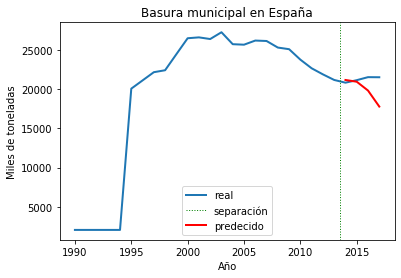

In [20]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura municipal en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Household

In [21]:
years = list(esp.Year)
mun = list(esp.Household)
predictions = clf2.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[1] for a in scalerY.inverse_transform([[0,a,0,0,0,0,0] for a in predictions])]

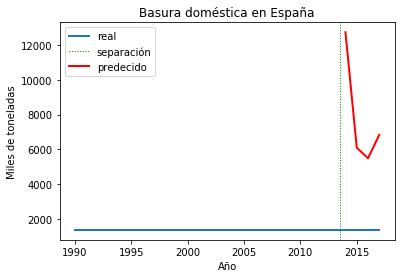

In [22]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura doméstica en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recovered

In [23]:
years = list(esp.Year)
mun = list(esp.Recovered)
predictions = clf3.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[2] for a in scalerY.inverse_transform([[0,0,a,0,0,0,0] for a in predictions])]

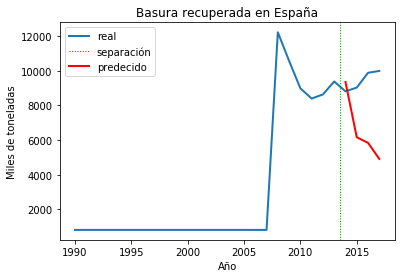

In [24]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura recuperada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recicled

In [25]:
years = list(esp.Year)
mun = list(esp.Recicled)
predictions = clf4.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[3] for a in scalerY.inverse_transform([[0,0,0,a,0,0,0] for a in predictions])]

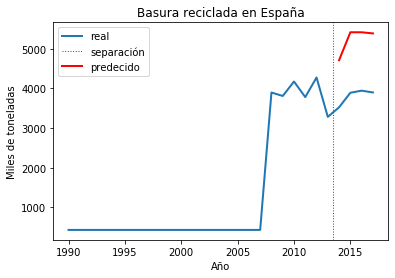

In [26]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura reciclada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Compost

In [27]:
years = list(esp.Year)
mun = list(esp.Compost)
predictions = clf5.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[4] for a in scalerY.inverse_transform([[0,0,0,0,a,0,0] for a in predictions])]

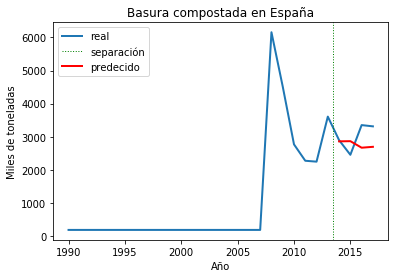

In [28]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura compostada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Disposal

In [29]:
years = list(esp.Year)
mun = list(esp.Disposal)
predictions = clf1.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[5] for a in scalerY.inverse_transform([[0,0,0,0,0,a,0] for a in predictions])]

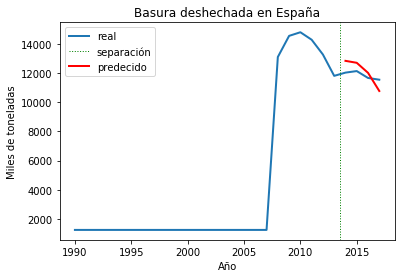

In [30]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura deshechada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()